In [2]:
import keras

In [3]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[1:10]

array([0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [10]:
from keras.regularizers import l2
l2()

In [11]:
x_train = x_train /255

In [12]:
x_test = x_test /255

In [13]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [14]:
model=Sequential()

In [15]:
model.add(Conv2D(activation="relu",filters=32,strides=1,padding="same",kernel_size=(3,3),input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(activation="relu",filters=26,strides=1,padding="same",kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(rate=0.2))
model.add(Dense(activation="relu",units=24))
model.add(Dense(activation="softmax",units=10))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 26)        7514      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 26)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1274)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1274)              0         
__________

In [17]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [18]:
from keras.callbacks import EarlyStopping

In [19]:
Early=[EarlyStopping(patience=3)]

In [20]:
Mod=model.fit(x_train,y_train,batch_size=32,epochs=30,callbacks=Early,verbose=1,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 72s 2ms/step - loss: 0.5721 - acc: 0.7920 - val_loss: 0.3893 - val_acc: 0.8592
Epoch 2/30
48000/48000 [==============================] - 11s 238us/step - loss: 0.3836 - acc: 0.8633 - val_loss: 0.3327 - val_acc: 0.8845
Epoch 3/30
48000/48000 [==============================] - 11s 236us/step - loss: 0.3398 - acc: 0.8782 - val_loss: 0.3005 - val_acc: 0.8911
Epoch 4/30
48000/48000 [==============================] - 11s 234us/step - loss: 0.3089 - acc: 0.8880 - val_loss: 0.2825 - val_acc: 0.8984
Epoch 5/30
48000/48000 [==============================] - 11s 235us/step - loss: 0.2894 - acc: 0.8954 - val_loss: 0.2624 - val_acc: 0.9038
Epoch 6/30
48000/48000 [==============================] - 11s 233us/step - loss: 0.2682 - acc: 0.9020 - val_loss: 0.2510 - val_acc: 0.9087
Epoch 7/30
48000/48000 [==============================] - 11s 232us/step - loss: 0.2587 - acc: 0.9048 - val_loss: 0.25

In [21]:
import matplotlib.pyplot as plt


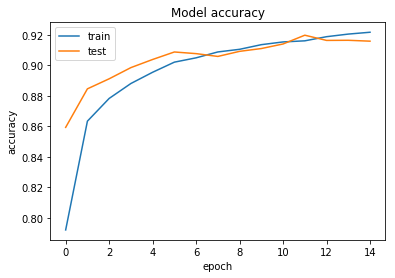

In [22]:
plt.plot(Mod.history['acc'])
plt.plot(Mod.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
Classes=model.predict_classes(x_test)

In [27]:
x_train.shape

(60000, 28, 28, 1)

2


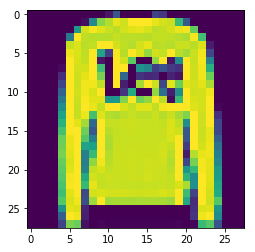

In [53]:
plt.imshow(x_test[1].reshape(28,28))
print(Classes[1])

In [38]:
fashion_mnist.get_file()

TypeError: get_file() missing 2 required positional arguments: 'fname' and 'origin'